In [1]:
import csv
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random

print('Done importing')

Done importing


In [2]:
def get_image_from_filename(filename):
    data_path = './data/' + filename
    bgr_image = cv2.imread(data_path)
    rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    return rgb_image

In [3]:
images, measurements = [], []
with open('./data/driving_log.csv', 'rt', encoding='utf8') as csvfile:
  reader = csv.DictReader(csvfile)
  for row in reader:
    center_image_filename = row['center'].lstrip()
    left_image_filename = row['left'].lstrip()
    right_image_filename = row['right'].lstrip()
    
    center_image = get_image_from_filename(center_image_filename)
    left_image = get_image_from_filename(left_image_filename)
    right_image = get_image_from_filename(right_image_filename)

    center_steering = float(row['steering'])
    # create adjusted steering measurements for the side camera images
    correction = 0.2
    left_steering = center_steering + correction
    right_steering = center_steering - correction
    
    images.extend([center_image, left_image, right_image])
    measurements.extend([center_steering, left_steering, right_steering])

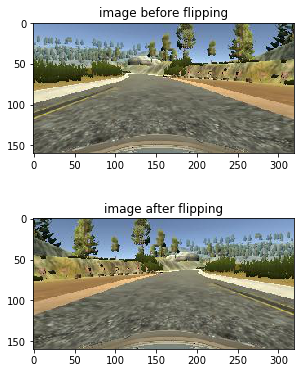

In [4]:
%matplotlib inline

fig, axes = plt.subplots(2, 1, figsize=(6, 6))
axes = axes.ravel()

index = random.randint(0, len(images))
img = images[index]
axes[0].imshow(img)
axes[0].set_title("image before flipping")

flipped_img = cv2.flip(img,1)
axes[1].imshow(flipped_img)
axes[1].set_title("image after flipping")
plt.subplots_adjust(wspace=0.5, hspace = 0.5)

In [5]:
print('===== Augmenting data =====')
augmented_images, augmented_measurements = [], []
for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    flipped_image = cv2.flip(image,1)
    flipped_measurement = -1.0 * measurement
    augmented_images.append(flipped_image)
    augmented_measurements.append(flipped_measurement)

print('Number of images before augmenting = ', len(images))
print('Number of images after augmenting = ', len(augmented_images))

===== Augmenting data =====
Number of images before augmenting =  24108
Number of images after augmenting =  48216


In [6]:
X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)


### Dataset summary

# Number of training examples
n_train = len(X_train)

# Shape of the traffic sign image
image_shape = X_train[0].shape

print("Number of training examples =", n_train)
print("Image data shape =", image_shape)

Number of training examples = 48216
Image data shape = (160, 320, 3)


In [ ]:
# Save to pickle file
data = {'features': X_train, 'labels': y_train}

training_data_file = './train_aug.p'

with open(training_data_file, mode='wb') as f:
  pickle.dump(data, f)

print('Done saving to file')